# Astrocytes: Synaptic Transporter Current (STC) and K current

#### **Basic instructions:**
#### 1. **To run code windows/blocks:** 

    - you can either hit the play button to the left of the code window 

    - or you can use they keyboard shortcut: select the block and press 'shift-enter'.

#### 2. **The first time** you run this code notebook, you might get a popup asking to choose which version of Python to use (the python "kernel"). **Just hit enter** to choose the base/default version.

#### 3. Make sure you data (.abf) files are in the "data" folder here on the left. You can just copy/paste the files from where they are saved on your computer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
update_plot_defaults()
%load_ext autoreload
%autoreload 2

## 1. Choose the data file you want to analyze

#### Put the .abf files with your Ih recordings in the "data/Astrocytes" folder

In [2]:
data_folder = "data/12-Astrocytes"

import os
print("Folders:")
for subdir in os.listdir(data_folder):
    if os.path.isdir(data_folder + "/" + subdir):
        print(f"'{data_folder}/{subdir}'")

Folders:
'data/12-Astrocytes/no drug'
'data/12-Astrocytes/PTX-NBQX-AP5'


In [3]:
data_folder_nodrug = 'data/12-Astrocytes/no drug'
data_folder_drug = 'data/12-Astrocytes/PTX-NBQX-AP5'

from glob import glob
data_files_nodrug = glob(data_folder_nodrug+"/*.abf")
data_files_nodrug.sort()
data_files_drug = glob(data_folder_drug+"/*.abf")
data_files_drug.sort()

print(data_files_nodrug)
print(data_files_drug)

['data/12-Astrocytes/no drug/2025_06_19_0021.abf', 'data/12-Astrocytes/no drug/2025_06_19_0022.abf', 'data/12-Astrocytes/no drug/2025_06_19_0023.abf', 'data/12-Astrocytes/no drug/2025_06_19_0024.abf', 'data/12-Astrocytes/no drug/2025_06_19_0025.abf', 'data/12-Astrocytes/no drug/2025_06_19_0026.abf', 'data/12-Astrocytes/no drug/2025_06_19_0027.abf', 'data/12-Astrocytes/no drug/2025_06_19_0028.abf', 'data/12-Astrocytes/no drug/2025_06_19_0029.abf', 'data/12-Astrocytes/no drug/2025_06_19_0030.abf', 'data/12-Astrocytes/no drug/2025_06_19_0031.abf', 'data/12-Astrocytes/no drug/2025_06_19_0032.abf', 'data/12-Astrocytes/no drug/2025_06_19_0033.abf', 'data/12-Astrocytes/no drug/2025_06_19_0034.abf', 'data/12-Astrocytes/no drug/2025_06_19_0035.abf', 'data/12-Astrocytes/no drug/2025_06_19_0036.abf', 'data/12-Astrocytes/no drug/2025_06_19_0037.abf', 'data/12-Astrocytes/no drug/2025_06_19_0038.abf', 'data/12-Astrocytes/no drug/2025_06_19_0039.abf', 'data/12-Astrocytes/no drug/2025_06_19_0040.abf',

In [4]:
# Select all the data files for each condition
filenames_single_stim_nodrug = [file for i,file in enumerate(data_files_nodrug) if i%2==0]
filenames_paired_stim_nodrug = [file for i,file in enumerate(data_files_nodrug) if i%2==1]

filenames_single_stim_drug = [file for i,file in enumerate(data_files_drug) if i%2==0]
filenames_paired_stim_drug = [file for i,file in enumerate(data_files_drug) if i%2==1]

print(f"Num single stim files, no drug: {len(filenames_single_stim_nodrug)}")
print(f"Num paired stim files, no drug: {len(filenames_paired_stim_nodrug)}")
print()
print(f"Num single stim files, drug: {len(filenames_single_stim_drug)}")
print(f"Num paired stim files, drug: {len(filenames_paired_stim_drug)}")

Num single stim files, no drug: 115
Num paired stim files, no drug: 115

Num single stim files, drug: 19
Num paired stim files, drug: 19


### Load and combine data files

In [5]:
traces_single_stim_nodrug = combine_traces_across_files(filenames_single_stim_nodrug, average_across_sweeps=False, recording_mode="V clamp")
print(traces_single_stim_nodrug)

traces_single_stim_nodrug.voltage_data[0:44] = traces_single_stim_nodrug.voltage_data[0:44]/20

Trace('data/12-Astrocytes/no drug/2025_06_19_0249.abf')
Number of sweeps: 115
Points per sweep: 20,000
Duration per sweep: 2.000 s
Sampling rate: 10000 Hz
Sampling interval: 0.100 ms
Available channels: Current, Voltage, TTL


In [6]:
traces_paired_stim_nodrug = combine_traces_across_files(filenames_paired_stim_nodrug, average_across_sweeps=False, recording_mode="V clamp")
print(traces_paired_stim_nodrug)

traces_paired_stim_nodrug.voltage_data[0:44] = traces_paired_stim_nodrug.voltage_data[0:44]/20

Trace('data/12-Astrocytes/no drug/2025_06_19_0250.abf')
Number of sweeps: 115
Points per sweep: 20,000
Duration per sweep: 2.000 s
Sampling rate: 10000 Hz
Sampling interval: 0.100 ms
Available channels: Current, Voltage, TTL


In [7]:
traces_single_stim_drug = combine_traces_across_files(filenames_single_stim_drug, average_across_sweeps=False, recording_mode="V clamp")
print(traces_single_stim_drug)

Trace('data/12-Astrocytes/PTX-NBQX-AP5/2025_06_19_0287.abf')
Number of sweeps: 19
Points per sweep: 20,000
Duration per sweep: 2.000 s
Sampling rate: 10000 Hz
Sampling interval: 0.100 ms
Available channels: Current, Voltage, TTL


In [8]:
traces_paired_stim_drug = combine_traces_across_files(filenames_paired_stim_drug, average_across_sweeps=False, recording_mode="V clamp")
print(traces_paired_stim_drug)

Trace('data/12-Astrocytes/PTX-NBQX-AP5/2025_06_19_0288.abf')
Number of sweeps: 19
Points per sweep: 20,000
Duration per sweep: 2.000 s
Sampling rate: 10000 Hz
Sampling interval: 0.100 ms
Available channels: Current, Voltage, TTL


Now we can load the files and plot the raw data:

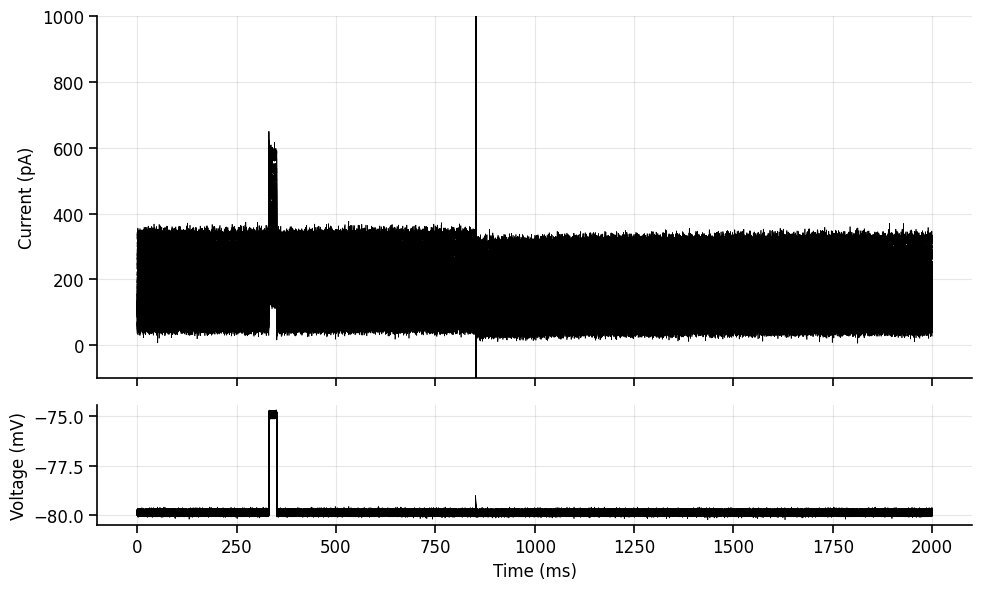

In [10]:
all_traces = {'Single stim, no drug': traces_single_stim_nodrug, 
              'Paired stim, no drug': traces_paired_stim_nodrug,
              'Single stim, drug': traces_single_stim_drug,
              'Paired stim, drug': traces_paired_stim_drug}


time_units = 'ms' # specify seconds (s), or milliseconds (ms)

# ----------------------------------------------------------------------------------------------------------------
%matplotlib inline
ax1,ax2 = traces_single_stim_nodrug.plot(plot_voltage=True, plot_current=True, plot_ttl=False, sweep='all', time_units=time_units)
ax1.set_ylim(-100,1000)
plt.show()

### Optional: remove bad sweeps

In [11]:
sweeps_to_remove = []

if len(sweeps_to_remove) > 0:
    traces.remove_sweeps(sweeps_to_remove)
    ax = traces.plot(plot_voltage=False, plot_ttl=False, time_units='ms', sweep='all')
    plt.show()

## 2. Signal processing

### Optional: apply additional highpass/lowpass filtering

Depending in you recording, you may have 50/60 Hz line noise, high-frequency noise, or drift in your recordings.

The goal here is to only remove the noise with minimal distortion of the data, so be careful not to overdo it

In [12]:
apply_filtering = False

You can run this next cell as many times as you want to fine-tune the filtering parameters:

In [13]:
if apply_filtering:
    filtered_traces = traces
    # # Step 1: Detrend the data to remove linear or constant trends (e.g slow drift)
    filtered_traces = filtered_traces.detrend(detrend_type='linear', num_segments=1)

    # Step 2: Lowpass filter (removes high-frequency noise)
    filtered_traces = filtered_traces.lowpass_filter(cutoff_freq = 3000) # Choose a value in units of Hz
    
    # Step 3: Bandpass filter (removes 50/60 Hz mainline noise)
    filtered_traces = filtered_traces.filter_line_noise(
        line_freq = 60, # Frequency (Hz) of noise to remove: 50 Hz (in Europe) or 60 Hz (in the US).
        width = 1, # Width (Hz) controls the width of frequency bands around the line frequency the filter cuts out.
        method = 'notch') # Options: 'notch' (IIR notch filter), 'bandstop' (Butterworth), or 'fft' (spectral).

    # Step 4: Highpass filter (removes low-frequency oscillations)
    # ------------------------------------------------------------
    # # Be extra careful with this next one, it tends to distort the data. Use only in case of emergency.
    # filtered_traces = filtered_traces.highpass_filter(cutoff_freq=0.001)
    # ------------------------------------------------------------

    # %matplotlib widget
    %matplotlib inline
    ax = traces.plot(plot_voltage=False, time_units=time_units, sweep='all')
    ax.set_title('Raw data', y=0.98)
    plt.show()

    ax = filtered_traces.plot(plot_voltage=False, time_units=time_units, sweep='all')
    ax.set_title('After filtering', y=0.98)
    plt.show()


Once you are happy with the filter setting, run the next cell to implement them:

In [14]:
if apply_filtering:
    traces=filtered_traces

### Optional: apply baseline correction

If your baseline current is not zero, you may need to correct for that to get accurate measurements.

Uncomment this cell block (highlight everything, then cmd+/ on macOS or ctrl+/ on Windows) to run it.

In [15]:
# Change this to True if you want to subtract the baseline from the sweeps.
subtract_baseline = True

BASELINE SUBTRACTED:
Baseline currents: [335.8704 338.1443 327.2317 ...  60.8589  59.7527  58.2998]
Baseline voltages: [-79.8464 -79.8552 -79.8545 ... -79.8747 -79.8723 -79.8787]


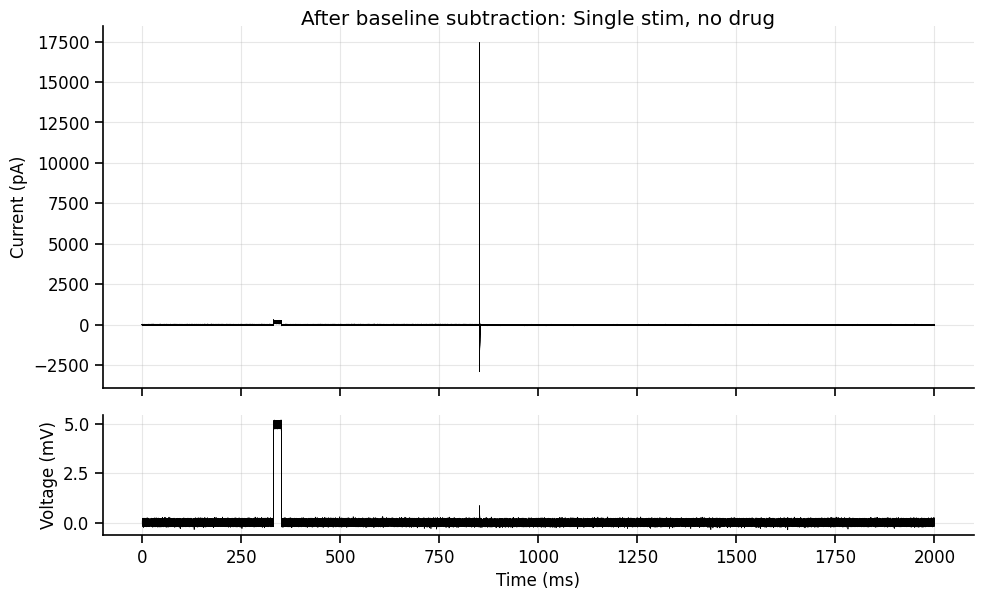

BASELINE SUBTRACTED:
Baseline currents: [344.6606 335.4949 320.2581 ...  61.1179  60.5178  61.781 ]
Baseline voltages: [-79.8445 -79.8557 -79.8531 ... -79.8757 -79.8687 -79.8783]


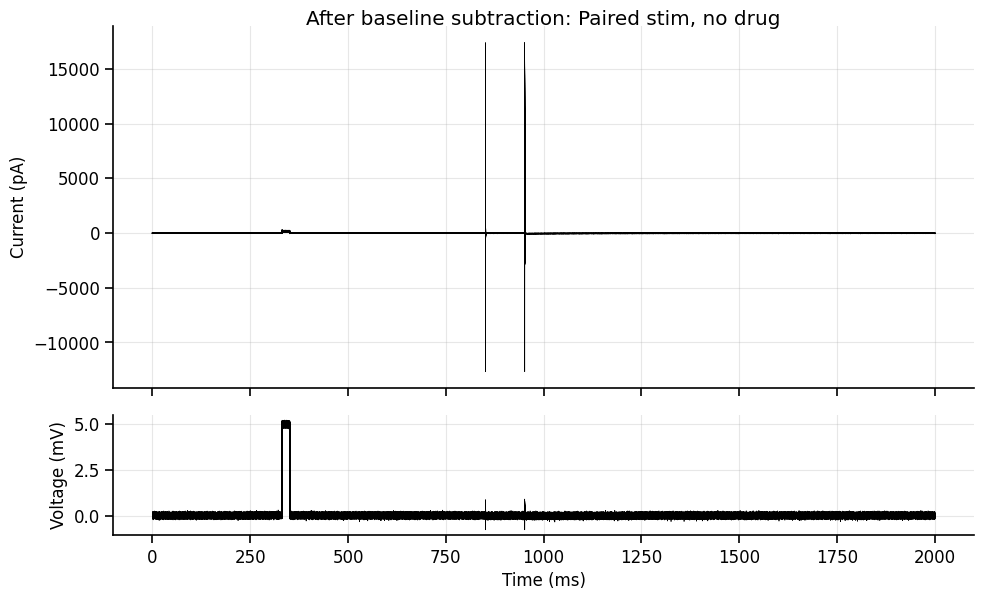

BASELINE SUBTRACTED:
Baseline currents: [59.2644 63.7056 61.9041 ... 61.5303 59.3645 60.6873]
Baseline voltages: [-79.8733 -79.8733 -79.8819 ... -79.8722 -79.8791 -79.8768]


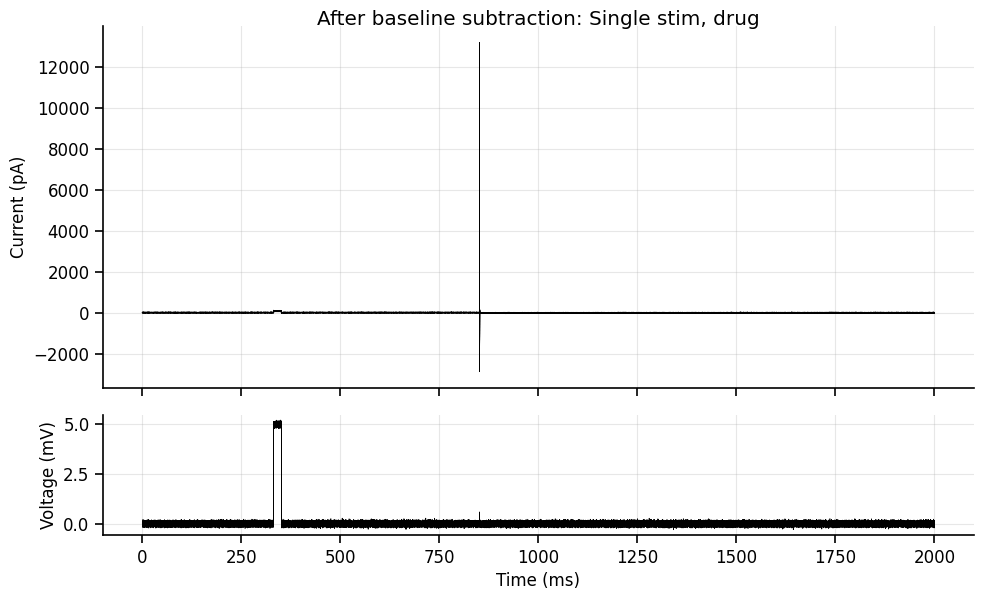

BASELINE SUBTRACTED:
Baseline currents: [63.8708 62.2083 62.5049 ... 61.1143 60.7922 61.1951]
Baseline voltages: [-79.8718 -79.8763 -79.8764 ... -79.868  -79.8754 -79.8733]


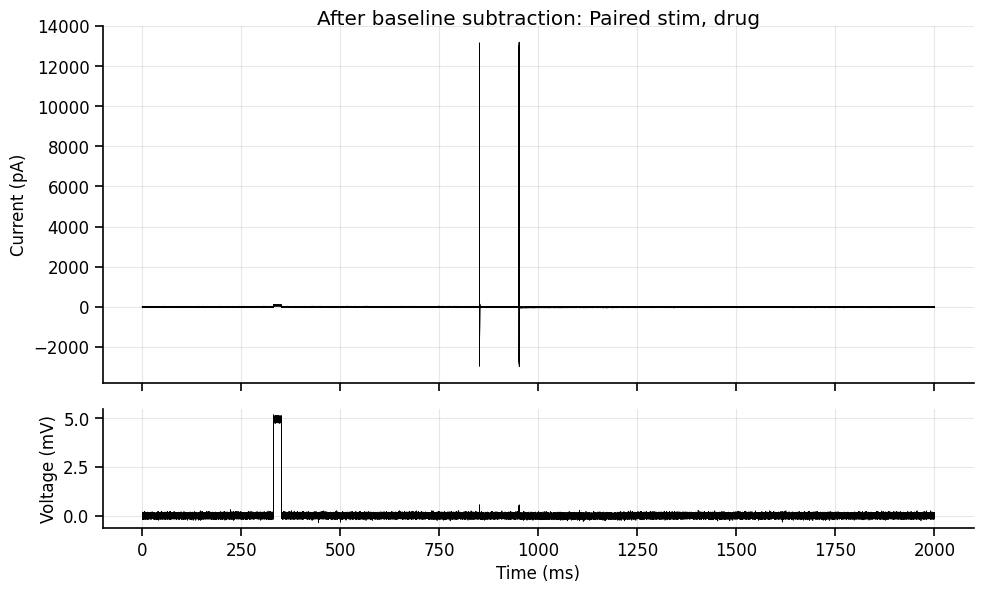

In [16]:
if subtract_baseline:
    for name, trace in all_traces.items():
        trace.subtract_baseline(start_time = 0, 
                                end_time = 250, 
                                time_units = 'ms',  # specify seconds (s), or milliseconds (ms)
                                channel = 'all')  # Options: 'current', 'voltage', 'all'
        %matplotlib inline
        ax1,ax2 = trace.plot(plot_voltage=True, plot_ttl=False, time_units=time_units, sweep='all')
        ax1.set_title(f'After baseline subtraction: {name}', y=0.98)
        plt.show()
else:
    print("BASELINE NOT SUBTRACTED")


## 3. Measure Series resistance over time/sweeps

In [17]:
stim_times = traces.get_step_events(threshold=5, channel='voltage', edge='rising', polarity='positive', time_units=time_units, sweep=0)
print(f"Test pulse time: {stim_times[0]} ms")

Test pulse time: 331.6 ms


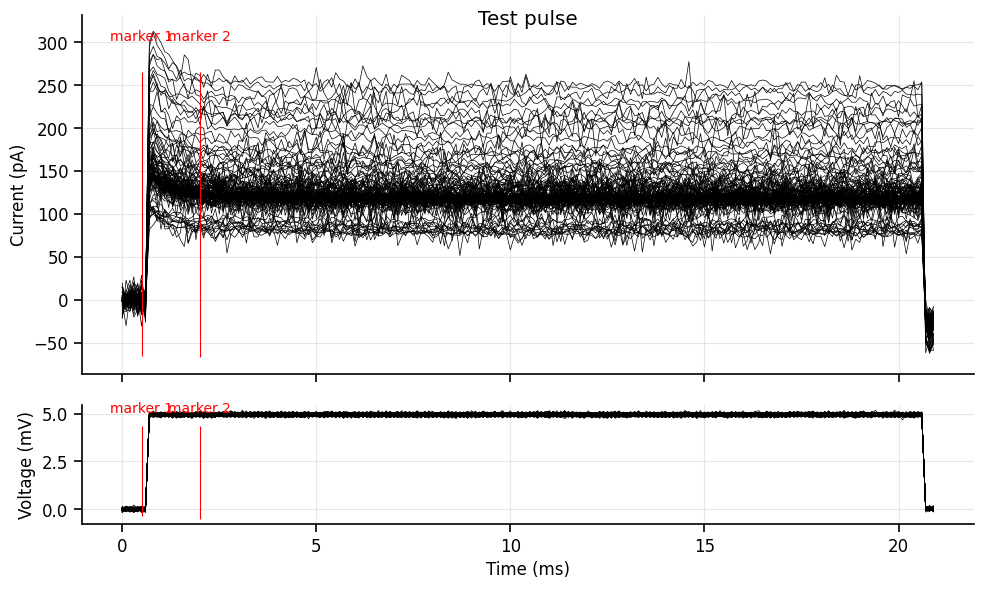

In [18]:
window_size = 21 #ms
marker_1 = 0.5
marker_2 = 2

test_pulse_traces = traces.crop(timepoint=stim_times[0]-1, window=window_size, time_units=time_units)

%matplotlib inline
ax1,ax2 = test_pulse_traces.plot(plot_voltage=True, plot_ttl=False, time_units=time_units, sweep='all', marker_1=marker_1, marker_2=marker_2)
ax1.set_title('Test pulse',y=0.95)
plt.show()

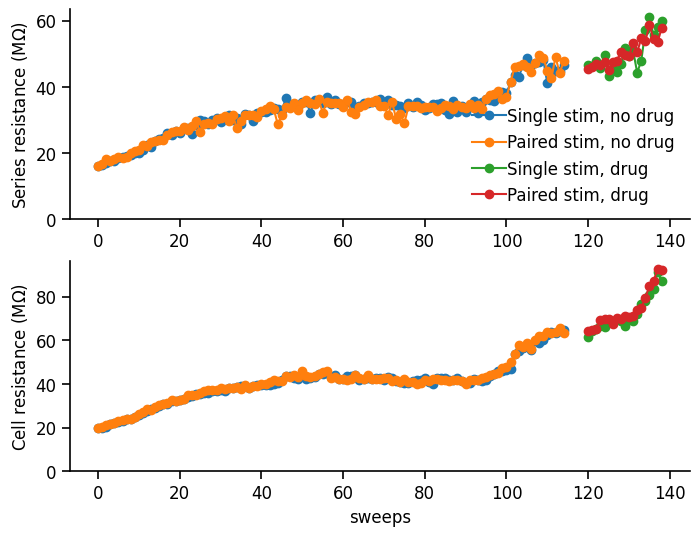

In [19]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,6))

for i, (name, traces) in enumerate(all_traces.items()):
    test_pulse_traces = traces.crop(timepoint=stim_times[0]-1, window=window_size, time_units=time_units)

    test_pulse_peak_currents, voltage = test_pulse_traces.get_measurements(start_time=marker_1,
                                                                end_time=marker_2,
                                                                measurement_type='max', 
                                                                time_units=time_units)
    voltage_step = np.mean(voltage)
    test_pulse_peak_currents_nA = test_pulse_peak_currents / 1000
    measured_series_resistance = voltage_step/test_pulse_peak_currents_nA


    test_pulse_ss_currents, voltage = test_pulse_traces.get_measurements(start_time=19,
                                                                end_time=20,
                                                                measurement_type='mean', 
                                                                time_units=time_units)
    voltage_step = np.mean(voltage)
    test_pulse_ss_currents_nA = test_pulse_ss_currents / 1000
    measured_cell_resistance = voltage_step / test_pulse_ss_currents_nA

    if i < 2:
        x = range(len(test_pulse_peak_currents))
    else:
        x = np.arange(len(test_pulse_peak_currents)) + 120

    ax1.plot(x, measured_series_resistance, '-o', label=name)
    ax2.plot(x, measured_cell_resistance, '-o', label=name)

ax1.set_ylabel('Series resistance (M$\Omega$)')
ax1.set_xlabel("sweeps")
ax1.set_ylim(bottom=0)
ax1.legend()

ax2.set_ylabel('Cell resistance (M$\Omega$)')
ax2.set_xlabel("sweeps")
ax2.set_ylim(bottom=0)
plt.show()

Based on the periods of stable Rs, we will select and average a set of 20 sweeps

In [20]:
sweeps = range(60,80)
all_traces['Single stim, no drug'].current_data = all_traces['Single stim, no drug'].current_data[sweeps]
all_traces['Single stim, no drug'].voltage_data = all_traces['Single stim, no drug'].voltage_data[sweeps]

all_traces['Paired stim, no drug'].current_data = all_traces['Paired stim, no drug'].current_data[sweeps]
all_traces['Paired stim, no drug'].voltage_data = all_traces['Paired stim, no drug'].voltage_data[sweeps]

## 4. Measure the STC + K currents to get paired pulse ratio

### 4.1. Crop the traces to the period after the first stim

Here we will determine the event times based on where the stim artifact (capacitive transient) is

In [25]:
# Find positive current peaks above threshold
stim_times = traces_single_stim_nodrug.get_event_times(threshold=12000, 
                                        polarity='positive', 
                                        time_units=time_units,
                                        channel='current', sweep=0)
print(f"Stim times: {stim_times} ms")

Stim times: [851.3] ms


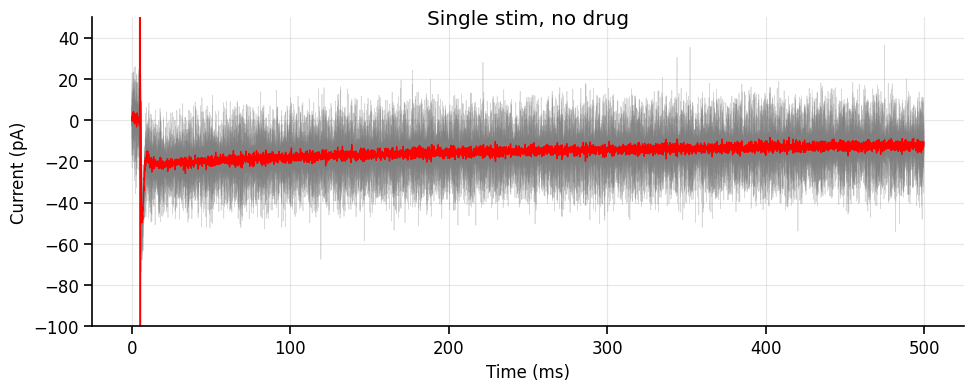

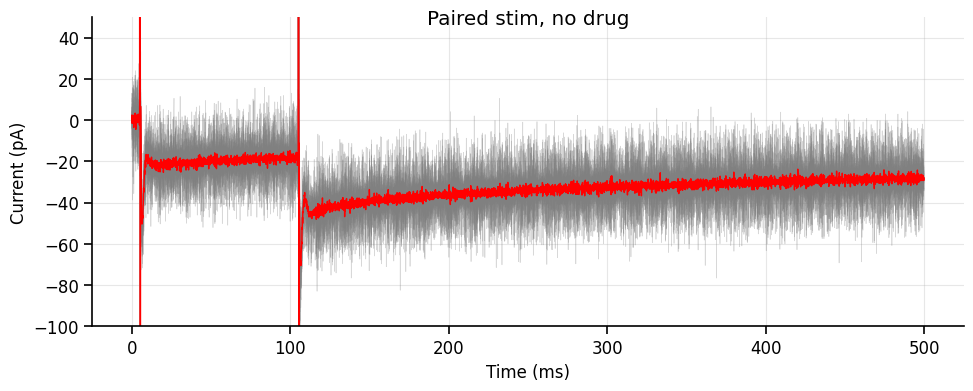

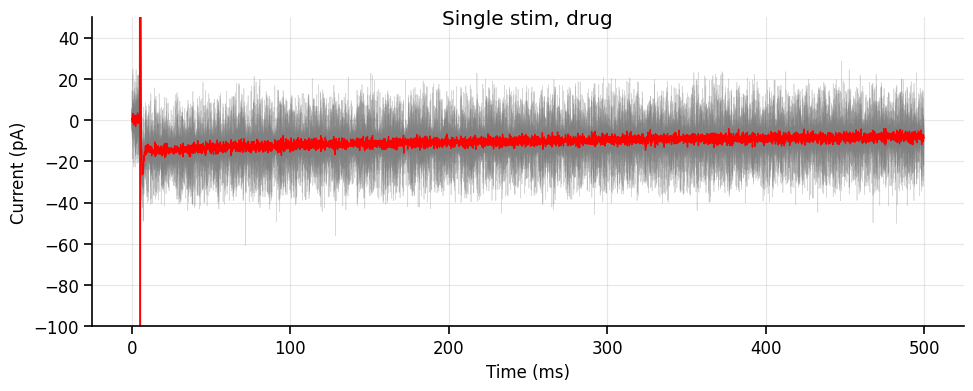

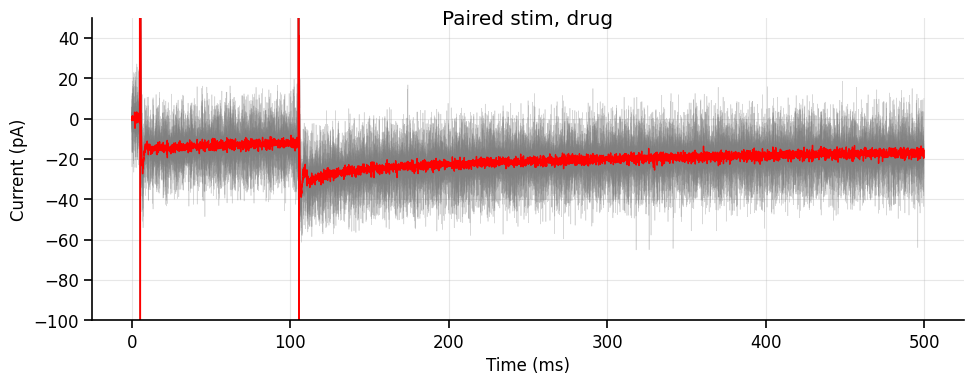

In [201]:
window_size = 500 #ms
y_axis_range = [-100,50]
baseline_time = 5
all_traces_crop = {}
for i, (name, traces) in enumerate(all_traces.items()):
    all_traces_crop[name] = traces.crop(timepoint=stim_times[0]-baseline_time, window=window_size, time_units=time_units)

    %matplotlib inline
    ax = all_traces_crop[name].plot(plot_voltage=False, plot_ttl=False, time_units=time_units, sweep='all', plot_mean=True)
    ax.set_ylim(y_axis_range)
    ax.set_title(f'{name}',y=0.95)
    plt.show()

### 4.1. Average the traces

In [202]:
all_traces_crop.keys()

dict_keys(['Single stim, no drug', 'Paired stim, no drug', 'Single stim, drug', 'Paired stim, drug'])

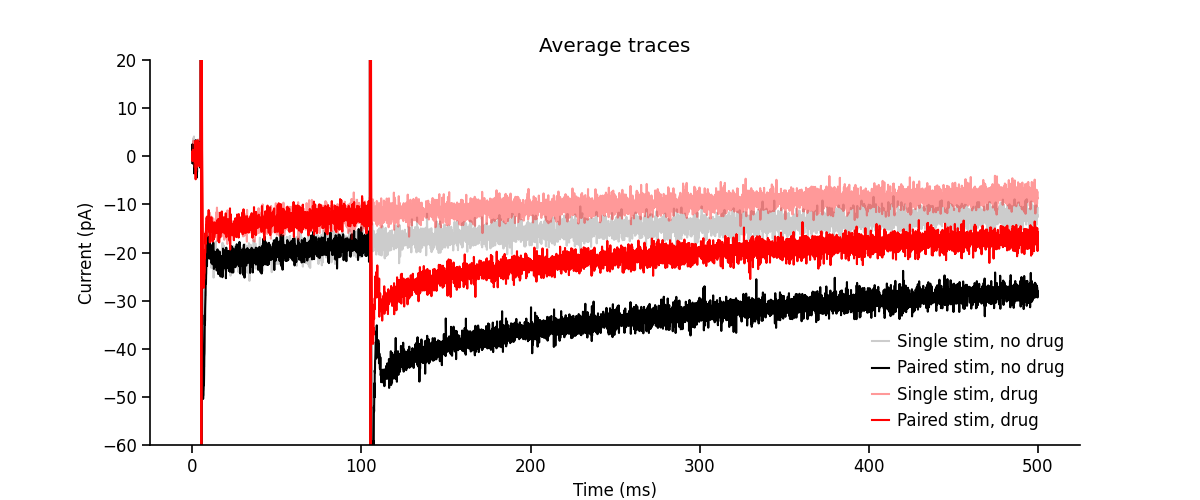

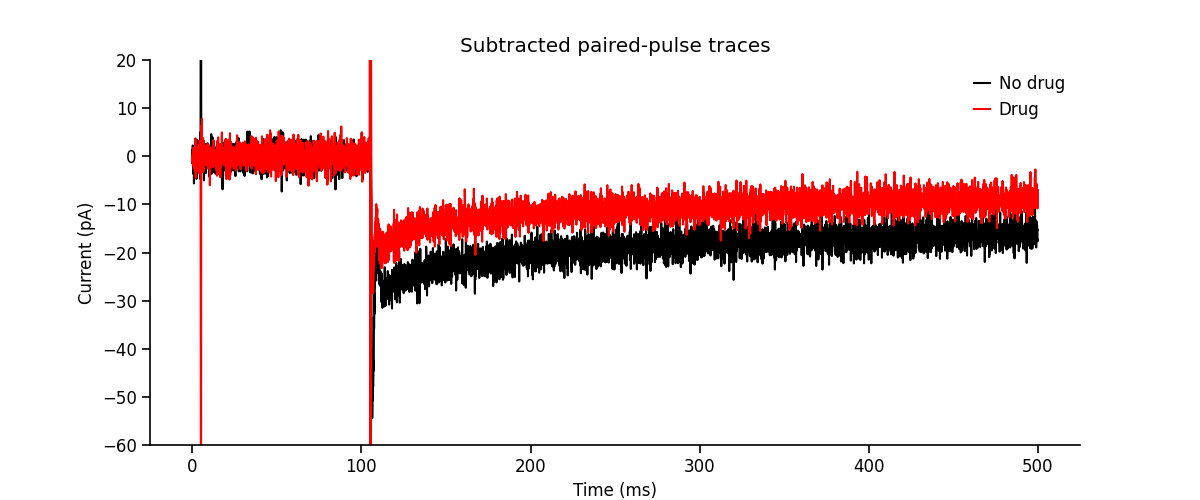

In [203]:
# %matplotlib inline
%matplotlib widget
fig, ax = plt.subplots(figsize=(12, 5))

avg_traces = {}
for i, (name, traces) in enumerate(all_traces_crop.items()):
    avg_traces[name] = np.mean(traces.current_data, axis=0)
    time = traces.time_ms
    if name == 'Paired stim, no drug':
        ax.plot(time, avg_traces[name], label=name, color='black')
    if name == 'Single stim, no drug':
        ax.plot(time, avg_traces[name], label=name, color='gray', alpha=0.4)
    if name == 'Paired stim, drug':
        ax.plot(time, avg_traces[name], label=name, color='red')
    if name == 'Single stim, drug':
        ax.plot(time, avg_traces[name], label=name, color='red', alpha=0.4)

y_axis_range = [-60, 20]

ax.set_ylim(y_axis_range)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current (pA)')
ax.legend(handlelength=1, handletextpad=0.5)
ax.set_title('Average traces')
plt.show()


subtracted_no_drug = avg_traces['Paired stim, no drug'] - avg_traces['Single stim, no drug']
subtracted_drug = avg_traces['Paired stim, drug'] - avg_traces['Single stim, drug']

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(time, subtracted_no_drug, label='No drug', color='black')
ax.plot(time, subtracted_drug, label='Drug', color='red')
ax.set_ylim(y_axis_range)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current (pA)')
ax.legend(handlelength=1, handletextpad=0.5)
ax.set_title('Subtracted paired-pulse traces')
plt.show()

### 4.2. Measure the STC amplitudes & paired-pulse ratio (PPR)

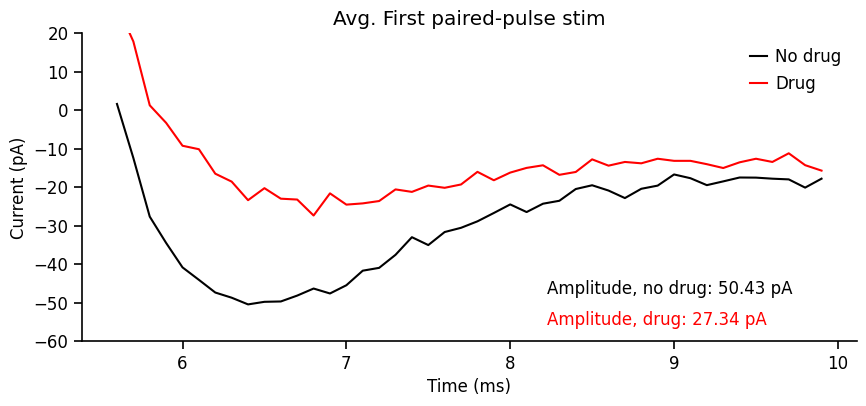

In [211]:
stc_start = 0.6 + baseline_time
stc_end = 5 + baseline_time

start_idx = time_to_index(stc_start, traces.sampling_rate, time_units=time_units)
end_idx = time_to_index(stc_end, traces.sampling_rate, time_units=time_units)
time[start_idx:end_idx]
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time[start_idx:end_idx],avg_traces['Paired stim, no drug'][start_idx:end_idx], color='black', label='No drug')
ax.plot(time[start_idx:end_idx],avg_traces['Paired stim, drug'][start_idx:end_idx], color='red', label='Drug')
ax.set_ylim(y_axis_range)
ax.set_title('Avg. First paired-pulse stim')
ax.set_xlabel(f'Time ({time_units})')
ax.set_ylabel('Current (pA)')
ax.legend(handlelength=1, handletextpad=0.5)

STC_no_drug_1 = np.abs(np.min(avg_traces['Paired stim, no drug'][start_idx:end_idx]))
STC_drug_1 = np.abs(np.min(avg_traces['Paired stim, drug'][start_idx:end_idx]))
ax.annotate(f'Amplitude, no drug: {STC_no_drug_1:.2f} pA', xy=(0.6, 0.2), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'Amplitude, drug: {STC_drug_1:.2f} pA', xy=(0.6, 0.1), xycoords='axes fraction', ha='left', va='top', color='red')
plt.show()

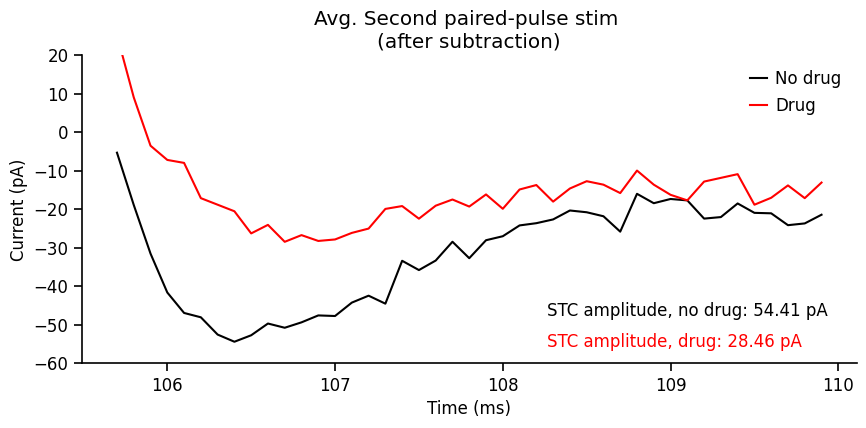

In [212]:
stc_start = 100.7 + baseline_time
stc_end = 105 + baseline_time

start_idx = time_to_index(stc_start, traces.sampling_rate, time_units=time_units)
end_idx = time_to_index(stc_end, traces.sampling_rate, time_units=time_units)

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time[start_idx:end_idx], subtracted_no_drug[start_idx:end_idx], color='black', label='No drug')
ax.plot(time[start_idx:end_idx], subtracted_drug[start_idx:end_idx], color='red', label='Drug')
ax.set_ylim(y_axis_range)
ax.set_title('Avg. Second paired-pulse stim \n(after subtraction)')
ax.set_xlabel(f'Time ({time_units})')
ax.set_ylabel('Current (pA)')
ax.legend(handlelength=1, handletextpad=0.5)

STC_no_drug_2 = np.abs(np.min(subtracted_no_drug[start_idx:end_idx]))
STC_drug_2 = np.abs(np.min(subtracted_drug[start_idx:end_idx]))
ax.annotate(f'STC amplitude, no drug: {STC_no_drug_2:.2f} pA', xy=(0.6, 0.2), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'STC amplitude, drug: {STC_drug_2:.2f} pA', xy=(0.6, 0.1), xycoords='axes fraction', ha='left', va='top', color='red')
plt.show()

### 3.4. Plot paired-pulse ratio

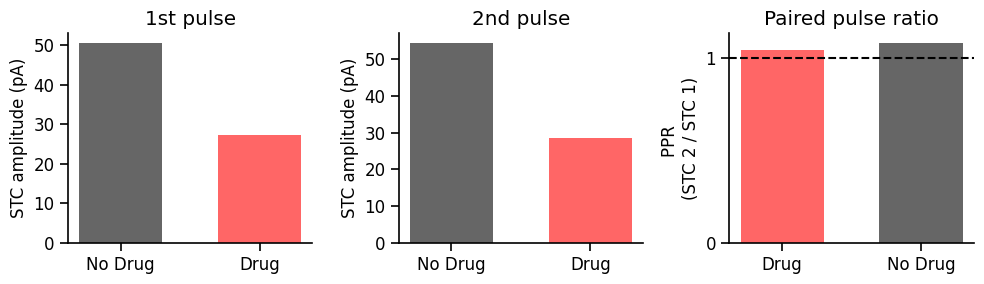

In [225]:
STC_paired_pulse_rato_nodrug = STC_no_drug_2 / STC_no_drug_1
STC_paired_pulse_rato_drug = STC_drug_2 / STC_drug_1

bar_width = 0.6

fig, ax  = plt.subplots(1,3, figsize=(10, 3))
ax[0].bar(1, STC_no_drug_1, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[0].bar(2, STC_drug_1, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(['No Drug', 'Drug'])
ax[0].set_ylabel('STC amplitude (pA)')
ax[0].set_title('1st pulse')

ax[1].bar(1, STC_no_drug_2, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[1].bar(2, STC_drug_2, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['No Drug', 'Drug'])
ax[1].set_ylabel('STC amplitude (pA)')
ax[1].set_title('2nd pulse')

ax[2].bar(2, STC_paired_pulse_rato_nodrug, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[2].bar(1, STC_paired_pulse_rato_drug, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[2].axhline(1, c='black', ls='--')
ax[2].set_xticks([1, 2])
ax[2].set_yticks([0, 1])
ax[2].set_xticklabels(['Drug', 'No Drug'])
ax[2].set_ylabel("PPR \n(STC 2 / STC 1)")
ax[2].set_title('Paired pulse ratio')

plt.tight_layout()
plt.show()


### 4.2. Measure the K current & paired-pulse ratio (PPR)

In [213]:
stc_start = 90 + baseline_time
stc_end = 99 + baseline_time

start_idx = time_to_index(stc_start, traces.sampling_rate, time_units=time_units)
end_idx = time_to_index(stc_end, traces.sampling_rate, time_units=time_units)

ss_no_drug_1 = np.abs(np.mean(avg_traces['Paired stim, no drug'][start_idx:end_idx]))
ss_drug_1 = np.abs(np.mean(avg_traces['Paired stim, drug'][start_idx:end_idx]))
ax.annotate(f'Steady-state current, no drug: {ss_no_drug_1:.2f} pA', xy=(0.6, 0.2), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'Steady-state current, drug: {ss_drug_1:.2f} pA', xy=(0.6, 0.1), xycoords='axes fraction', ha='left', va='top', color='red')
plt.show()

In [214]:
stc_start = 190 + baseline_time
stc_end = 199 + baseline_time

start_idx = time_to_index(stc_start, traces.sampling_rate, time_units=time_units)
end_idx = time_to_index(stc_end, traces.sampling_rate, time_units=time_units)

ss_no_drug_2 = np.abs(np.mean(subtracted_no_drug[start_idx:end_idx]))
ss_drug_2 = np.abs(np.mean(subtracted_drug[start_idx:end_idx]))
ax.annotate(f'Steady-state current, no drug: {ss_no_drug_2:.2f} pA', xy=(0.6, 0.2), xycoords='axes fraction', ha='left', va='top')
ax.annotate(f'Steady-state current, drug: {ss_drug_2:.2f} pA', xy=(0.6, 0.1), xycoords='axes fraction', ha='left', va='top', color='red')
plt.show()

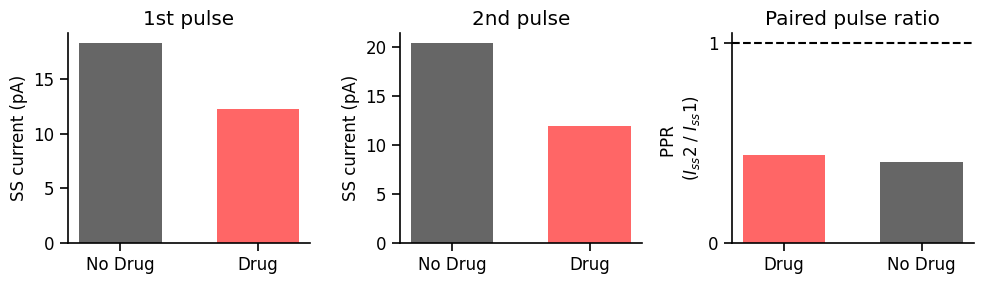

In [223]:
ss_paired_pulse_rato_nodrug = ss_no_drug_2 / STC_no_drug_1
ss_paired_pulse_rato_drug = ss_drug_2 / STC_drug_1

bar_width = 0.6

fig, ax  = plt.subplots(1,3, figsize=(10, 3))
ax[0].bar(1, ss_no_drug_1, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[0].bar(2, ss_drug_1, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(['No Drug', 'Drug'])
ax[0].set_ylabel('SS current (pA)')
ax[0].set_title('1st pulse')

ax[1].bar(1, ss_no_drug_2, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[1].bar(2, ss_drug_2, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['No Drug', 'Drug'])
ax[1].set_ylabel('SS current (pA)')
ax[1].set_title('2nd pulse')

ax[2].bar(2, ss_paired_pulse_rato_nodrug, label='No Drug', color='k', alpha=0.6, width=bar_width)
ax[2].bar(1, ss_paired_pulse_rato_drug, label='Drug', color='r', alpha=0.6, width=bar_width)
ax[2].axhline(1, c='black', ls='--')
ax[2].set_xticks([1, 2])
ax[2].set_yticks([0, 1])
ax[2].set_xticklabels(['Drug', 'No Drug'])
ax[2].set_ylabel("PPR \n($I_{ss}$2 / $I_{ss}$1)")
ax[2].set_title('Paired pulse ratio')

plt.tight_layout()
plt.show()
